# Lab 2. Recommender systems
* Music Technologies ([Tecnologías de la Música](https://aplicaciones.uc3m.es/cpa/generaFicha?est=214&&plan=441&asig=18510&idioma=1)). Bachellor Degree in Telecommunication Engineering. 
* Universidad Carlos III de Madrid

* Author: Antonio Rodríguez Hidalgo ([CV](https://arodriguezhidalgo.github.io/CV/))

In this lab session students will acquire some intuitions about how recommender systems work. They will be tasked to program part of the code for such goal, including the following approaches:
* User-to-user recommenders.
* Item-to-item recommenders.
* Feature-based recommenders.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa, librosa.display
import matplotlib.pyplot as plt
import random, os, warnings
import seaborn as sn
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
warnings.filterwarnings("ignore")

%matplotlib inline

# This code is the same than the one designed for the Lab for music genre classification.

filen= open(os.path.join('./input/gtzan-genre-collection/genres/input.txt'),'r');
filelist = [];
y_text = [];
y = [];

filen= os.path.join('./input/gtzan-genre-collection/genres/input.txt');
with open(filen, 'r') as f:
    lines = f.read().split('\n')
    # print(lines)
for line in lines[:-1]:
    line = line.replace('/Users/sness/mirex2008', './input/gtzan-genre-collection').replace('.wav','.au').split('	')
    line_x = line[0];
    line_y = line[1];
    filelist.append(line_x);
    y_text.append(line_y.replace('\n',''));
    

# We do not need one-hot encoding. In that case, we can use an Identity matrix.
y_labels = {}
for i,j in enumerate(set(y_text)):
    y_labels[j] = i;
y_labels
# We encode labels using a numeric dictionary
for i in range(len(y_text)):
    y.append(y_labels[y_text[i]])

y = np.asarray(y);
clear_output()


# User generator (teacher code)
We divide data into train and test.


In [3]:
rand_seed = 1492;
rand_index = random.sample(range(len(filelist)), len(filelist))
file_train = [filelist[i] for i in rand_index];
y_train = y[rand_index]; 


We create two functions to generate some random users according to certain rules.
* user_generator(): it receives the genre tastes of a future subject as well as the whole filelist. It selects a certain number of songs from each genre according to the setup of the desired user, and assigns a number of repetitions to each of the selected songs.
* style_generator(): function that provides a set of configuration for different users. In particular, each subject profile receives a number of audio files from each genre. In addition to that pre-set value, another random (integer) number is added, so every new subject is different to the others, even though it is clearly biased towards one or more subjects.


In [4]:
def user_generator(user_file, files):
    '''
    This function receives as an input a 'user_file' variable that contains a setup for
    a user. That is, a biased set of files for a certain subject that defines its musical
    tastes. A random set of audio files is selected for each of the genres he/she likes
    depending on his/her bias. For each of such files a random number of repetitions
    is assigned, which represents the number of times that such song was played by the user.
    
    The variable 'files' represents the audio files pool.
    
    Notice that the function returns a set of songs and their played times for the subject,
    which can be easily placed into a Pandas DataFrame.
    '''
    
    user_aux = {};
    for i in user_file.keys():
        user_aux[i] = int(np.ceil(user_file[i]*n_files/100));

    user_counter = {'pop':0,'disco':0,'reggae':0,'country':0,'blues':0,'metal':0,'hiphop':0,'jazz':0,'classical':0,'rock':0}
    taste_list = [];
    for i in files:
        song_genre = i.split('/')[4];
        if user_counter[song_genre] < user_aux[song_genre]:
            np.random.seed(user_counter[song_genre])
            taste_list.append((i,
                               int(np.random.randint(10, 300, 1)[0]*np.sqrt(user_aux[song_genre]))
                               ))
            user_counter[song_genre]+=1;

    return taste_list

def style_generator(user_kind):
    '''
    This function contains 8 user definitions representing different musical tastes. Each
    musical taste has a certain bias for one or more genres, although it changes randomly
    for each iteration of the function.
    '''
    if user_kind == 1:
        user = {'pop':1+np.random.randint(n_random),'disco':1+np.random.randint(n_random),'reggae':1+np.random.randint(n_random),
                    'country':1+np.random.randint(n_random),'blues':9+np.random.randint(n_random),'metal':1+np.random.randint(n_random),
                    'hiphop':1+np.random.randint(n_random),'jazz':18+np.random.randint(n_random),'classical':66+np.random.randint(n_random),
                    'rock':1+np.random.randint(n_random)}

    elif user_kind == 2:
        user = {'pop':0+np.random.randint(n_random),'disco':0+np.random.randint(n_random),'reggae':0+np.random.randint(n_random),
                    'country':0+np.random.randint(n_random),'blues':10+np.random.randint(n_random),'metal':40+np.random.randint(n_random),
                    'hiphop':10+np.random.randint(n_random),'jazz':10+np.random.randint(n_random),'classical':0+np.random.randint(n_random),
                    'rock':28+np.random.randint(n_random)}

    elif user_kind == 3:
        user = {'pop':40+np.random.randint(n_random),'disco':30+np.random.randint(n_random),'reggae':0+np.random.randint(n_random),
                    'country':0+np.random.randint(n_random),'blues':0+np.random.randint(n_random),'metal':0+np.random.randint(n_random),
                    'hiphop':0+np.random.randint(n_random),'jazz':0+np.random.randint(n_random),'classical':0+np.random.randint(n_random),
                    'rock':30+np.random.randint(n_random)}

    elif user_kind == 4:
        user = {'pop':5+np.random.randint(n_random),'disco':0+np.random.randint(n_random),'reggae':60+np.random.randint(n_random),
                    'country':0+np.random.randint(n_random),'blues':0+np.random.randint(n_random),'metal':0+np.random.randint(n_random),
                    'hiphop':30+np.random.randint(n_random),'jazz':10+np.random.randint(n_random),'classical':0+np.random.randint(n_random),
                    'rock':5+np.random.randint(n_random)}

    elif user_kind == 5:
        user = {'pop':5+np.random.randint(n_random),'disco':12+np.random.randint(n_random),'reggae':5+np.random.randint(n_random),
                    'country':0+np.random.randint(n_random),'blues':30+np.random.randint(n_random),'metal':0+np.random.randint(n_random),
                    'hiphop':30+np.random.randint(n_random),'jazz':10+np.random.randint(n_random),'classical':3+np.random.randint(n_random),
                    'rock':50+np.random.randint(n_random)}

    elif user_kind == 6:
        user = {'pop':5+np.random.randint(n_random),'disco':12+np.random.randint(n_random),'reggae':5+np.random.randint(n_random),
                    'country':60+np.random.randint(n_random),'blues':10+np.random.randint(n_random),'metal':0+np.random.randint(n_random),
                    'hiphop':15+np.random.randint(n_random),'jazz':10+np.random.randint(n_random),'classical':3+np.random.randint(n_random),
                    'rock':5+np.random.randint(n_random)}

    elif user_kind == 7:
        user = {'pop':5+np.random.randint(n_random),'disco':12+np.random.randint(n_random),'reggae':5+np.random.randint(n_random),
                    'country':5+np.random.randint(n_random),'blues':60+np.random.randint(n_random),'metal':5+np.random.randint(n_random),
                    'hiphop':0+np.random.randint(n_random),'jazz':10+np.random.randint(n_random),'classical':3+np.random.randint(n_random),
                    'rock':15+np.random.randint(n_random)}

    elif user_kind == 8:
        user = {'pop':5+np.random.randint(n_random),'disco':12+np.random.randint(n_random),'reggae':5+np.random.randint(n_random),
                    'country':0+np.random.randint(n_random),'blues':10+np.random.randint(n_random),'metal':0+np.random.randint(n_random),
                    'hiphop':5+np.random.randint(n_random),'jazz':60+np.random.randint(n_random),'classical':3+np.random.randint(n_random),
                    'rock':5+np.random.randint(n_random)}
    
    return user

We generate a set of subjects and their corresponding interaction matrix.
The latter represents in the Y-axis the index of a subject, whereas the X-axis represents a certain song. The C-axis value (or Z) represents how many times a certain subject A played the song B.

In [5]:
user_list = {}
n_subjects = 1000;
n_random = 20;

for user_id in range(n_subjects):
    file_train_random = random.sample(file_train, len(file_train));
    n_files = np.random.randint(50,100+1,1)[0];

    user = style_generator(random.randint(1,8))
    user_file_list = user_generator(user, file_train_random)
    user_list[str(user_id)] = {'user_file_list':user_file_list, 'user':user};

## Interaction matrices (teacher code)


In [6]:
write_matrix = True;

if write_matrix == True:
    # We create an emtpy interaction matrix
    interaction_matrix = pd.DataFrame([], index = user_list.keys(), columns = file_train)
    interaction_matrix.fillna(0, inplace=True)

    # # We fill the content of the matrix using user data with the structure generated above.
    for user_id in user_list.keys():
        for file_id in user_list[user_id]['user_file_list']:
            interaction_matrix.loc[user_id][file_id[0]]+=file_id[1]

    interaction_matrix.to_csv('interaction_matrix.csv')
    del interaction_matrix

# Student user
This time we generate the user that we will provide to a student, for example. The procedure is similar to the one described before: we set up a certain number of music files to each genre, which are randomly selected for the subject and produce a representation of the profile of the subject.

The pattern to create the profile is stored in the variable 'user', whereas its playlists are stored in 'user_vector'.

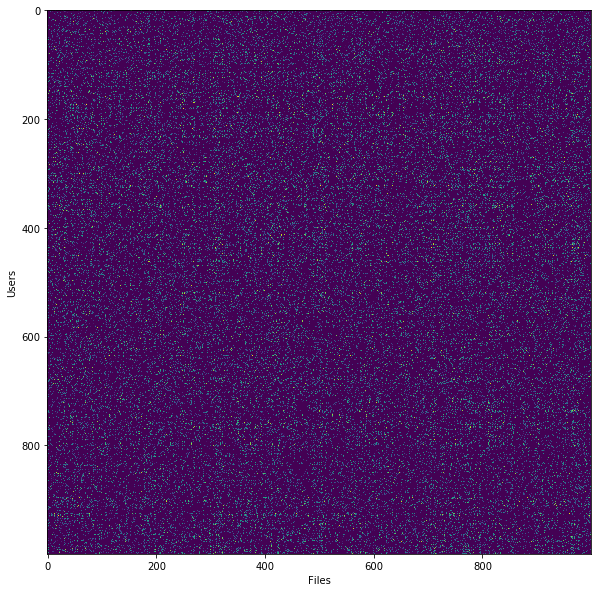

In [7]:
interaction_matrix = pd.read_csv('interaction_matrix.csv', index_col=0)
plt.figure(figsize=(20,10))
plt.imshow(interaction_matrix);
plt.xlabel('Files');
plt.ylabel('Users');


In [114]:
''' 
*****************************************************
TASK: 
Use your NIA as the seed for the system
'''    
n_seed = 1001256;
np.random.seed(n_seed)
''' 
END OF THE TASK. 
*****************************************************
'''

''' 
*****************************************************
TASK: 
Define the number of weights for the subject you want to define. That is, you write what 
genres should have a bigger weight by using bigger integer values. It is recommended
to use values smaller than 60. We recommend to set these values according to your own
musical tastes.
'''    
user = {'pop':      40+np.random.randint(n_random),
        'disco':    30+np.random.randint(n_random),
        'reggae':    0+np.random.randint(n_random),
        'country':   0+np.random.randint(n_random),
        'blues':     0+np.random.randint(n_random),
        'metal':     0+np.random.randint(n_random),
        'hiphop':    0+np.random.randint(n_random),
        'jazz':      0+np.random.randint(n_random),
        'classical': 0+np.random.randint(n_random),
        'rock':     30+np.random.randint(n_random)
       }
user_file_list = user_generator(user, file_train_random)
''' 
END OF THE TASK. 
*****************************************************
'''


'''
The following lines generate a Pandas DataFrame using the user data that we have generated
for the student. It gets stored in the variable 'user_vector'.
'''
student_id = str(n_seed)
user_vector = pd.DataFrame([], index = [student_id], columns = file_train)
user_vector.fillna(0, inplace=True)

for file_id in user_file_list:
    user_vector.loc[student_id][file_id[0]]+=file_id[1];
user_DF = pd.DataFrame(user, index = [student_id])

# User-to-user recommender
We now design a function that receives as an input an interaction matrix and the profile of a certain user. The idea is that we will use user-to-user recommendation, which means that a model will be fit using the interaction matrix as its input. Then, the profile of a student will be used as input, and its output will determine what users from the interaction matrix are more similar.

Then, we determine their top songs and their weight according to their repetition number. We finally recommend those songs that have a big score after adding the weights of the top 5 subjects of the interaction matrix.

In [115]:
from sklearn.neighbors import NearestNeighbors
def recommender_user2user(interaction_matrix, user_data):
    ''' 
    *****************************************************
    TASK: 
    The student must train a model using the interaction matrix considering the
    following aspects:
    * Each user will be a sample for the model.
    * Each item (song) will be a feature for the model.
    Here are some comments about how Scikit-learn manages data:
       https://scikit-learn.org/stable/tutorial/basic/tutorial.html
       
    The recommended model is KNN. Once the model is trained, they should make a prediction,
    which shall show the closest neighbors.
    ''' 
    train_data = interaction_matrix;
    clf = NearestNeighbors();
    clf.fit(train_data)    
    out = clf.kneighbors(user_data)
    ''' 
    END OF THE TASK. 
    *****************************************************
    '''
    
    
    print('*************************************')
    print('Top-5 neighbors:')
    print('------------------------------------')
    print('{}'.format(out[1][0]))
    
    '''
    We select the top neighbors and see which files they recommend. In order to do so, we normalize each of the user rows in the range [0,1],
    so in order to choose which song is the most popular we only need to use the sum operator in axis=0.
    '''
    neighbors_data = train_data.loc[[(i) for i in(out[1][0])]];
    neighbors_data = neighbors_data/np.expand_dims(np.sum(neighbors_data, axis=1),axis=1)*np.ones((1,neighbors_data.shape[1]))
    recommendation_vector = np.sum(neighbors_data,axis=0);
    recommendation_vector.sort_values(inplace=True, ascending = False)
    return recommendation_vector


recommendation_vector = recommender_user2user(interaction_matrix, user_vector)

*************************************
Top-5 neighbors:
------------------------------------
[ 23 999 680  80 992]


It is important to know that some of the subjects that will be recommended might be already liked in the profile that we provide for students. Consequently, we must distinguish between known and new unknown songs.

In [116]:
# Songs that the user already has in his repo list.
known_songs = ((recommendation_vector > 0)*(user_vector > 0)*recommendation_vector).loc[student_id].sort_values(ascending = False)

''' 
*****************************************************
TASK: 
Copy and edit the previous line of code so instead of showing the songs that were recommended but are already
known by the user, they show only new songs.
''' 
# Songs that the user already has in his repo list.
new_songs = ((recommendation_vector > 0)*(user_vector == 0)*recommendation_vector).loc[student_id].sort_values(ascending = False)
''' 
END OF THE TASK. 
*****************************************************
'''

print('User preferences:')
display(user_DF)

print()
print('*************************************')
print('TOP-5 (SONGS YOU ALREADY KNOW):')
print('------------------------------------')
for i,j in known_songs[0:5].items():
    print('Song: {}. Score: {:.4f}'.format(i.split('/')[-1],j))

print('\n*************************************')
print('TOP-10 (SONGS YOU SHOULD KNOW):')
print('------------------------------------')
for i,j in new_songs[0:10].items():
    print('Song: {}. Score: {:.4f}'.format(i.split('/')[-1],j))

User preferences:


,pop,disco,reggae,country,blues,metal,hiphop,jazz,classical,rock
1001256,55,32,12,5,18,13,8,4,3,36



*************************************
TOP-5 (SONGS YOU ALREADY KNOW):
------------------------------------
Song: pop.00053.au. Score: 0.0660
Song: pop.00096.au. Score: 0.0592
Song: pop.00040.au. Score: 0.0553
Song: disco.00092.au. Score: 0.0473
Song: pop.00024.au. Score: 0.0432

*************************************
TOP-10 (SONGS YOU SHOULD KNOW):
------------------------------------
Song: pop.00008.au. Score: 0.0454
Song: pop.00057.au. Score: 0.0444
Song: pop.00068.au. Score: 0.0393
Song: rock.00020.au. Score: 0.0359
Song: disco.00068.au. Score: 0.0322
Song: pop.00043.au. Score: 0.0302
Song: pop.00006.au. Score: 0.0301
Song: pop.00091.au. Score: 0.0299
Song: pop.00017.au. Score: 0.0288
Song: pop.00075.au. Score: 0.0282


# Recommender item-2-item
Our next proposal follows the item-to-item approach. The procedure is similar to the user-2-user one, although this time samples represent song names and subjects are the features under analysis. 

We get the user-vector for the favourite song of our profile, which provides a weight for each of the subjects from the interaction matrix for that specific song. KNN looks for the closest user-vectors into the matrix, and provides a score for each of them. We return the closest ones, which represent potential recommended songs.

In [125]:
from sklearn.neighbors import NearestNeighbors
def recommender_item2item(train_data, user_data):    
    ''' 
    *****************************************************
    TASK: 
    1. Students must find what is the favourite song from their list ('user_data') considering the number of 
    repetitions. 
    2. Then, using such song name they will get the repetitions from the users of the interaction
    matrix (train_data).
    3. Afterwards, they will train a KNN model using 20 neighbors, considering that this time the features 
    will be the users, whereas samples will be the songs.
    4. Finally, using the matrix outcome from step 2 for the favourite song, we will get songs have a similar 
    user distribution from the matrix. This means that we will look for songs (samples) whose users (features)
    will have similar tastes (depending on the number of repetitions).
    ''' 
    # We get the favourite song of the user
    favourite_song = user_data.loc[student_id].argmax()
    item_vector = train_data[favourite_song]    
    clf = NearestNeighbors(20);
    clf.fit(train_data.T)
    out = clf.kneighbors(np.expand_dims(item_vector,axis=0))
    ''' 
    END OF THE TASK. 
    *****************************************************
    '''
    
    
    print('*************************************')
    print('Top-20 songs:')
    print('------------------------------------')
    print('{}'.format(out[1][0]))


    '''
    We select the top neighbors and see which files they recommend. In order to do so, we normalize each of the user rows in the range [0,1],
    so in order to choose which song is the most popular we only need to use the sum operator in axis=0.
    '''
    songs_data = [(train_data.columns[j],i) for i,j in zip(out[0][0],out[1][0])]

    return songs_data


recommendations = recommender_item2item(interaction_matrix, user_vector)


*************************************
Top-20 songs:
------------------------------------
[515 829 538 777  62 629 328 773 207 798 406 843  60 276 613 617 251 962
 296 737]


We determine which songs are actually new for the profile we are providing.

In [130]:
known_songs = [];
new_songs = [];
for i,j in recommendations[1:]: # We remove the first song, since it is the favourite one (distance 0).
    if user_vector.loc[student_id][i] > 0:
        known_songs.append((i,j));
    else:
        new_songs.append((i,j));
  
print('User preferences:')
display(user_DF)

print()
print('*************************************')
print('TOP-5 (SONGS YOU ALREADY KNOW):')
print('------------------------------------')
for i,j in known_songs[0:5]:
    print('Song: {}. Score (distance): {:.2f}'.format(i.split('/')[-1],j))

print()
print('*************************************')
print('TOP-10 (SONGS YOU SHOULD KNOW):')
print('------------------------------------')
for i,j in new_songs[0:10]:
    print('Song: {}. Score (distance): {:.2f}'.format(i.split('/')[-1],j))

User preferences:


,pop,disco,reggae,country,blues,metal,hiphop,jazz,classical,rock
1001256,55,32,12,5,18,13,8,4,3,36



*************************************
TOP-5 (SONGS YOU ALREADY KNOW):
------------------------------------
Song: pop.00007.au. Score (distance): 10592.67
Song: pop.00094.au. Score (distance): 10606.62
Song: pop.00005.au. Score (distance): 10636.40
Song: pop.00031.au. Score (distance): 10639.12
Song: pop.00090.au. Score (distance): 10669.32

*************************************
TOP-10 (SONGS YOU SHOULD KNOW):
------------------------------------
Song: pop.00006.au. Score (distance): 10174.62
Song: pop.00021.au. Score (distance): 10258.22
Song: pop.00020.au. Score (distance): 10445.52
Song: pop.00032.au. Score (distance): 10477.94
Song: pop.00093.au. Score (distance): 10548.60
Song: pop.00043.au. Score (distance): 10555.50
Song: pop.00025.au. Score (distance): 10566.88
Song: pop.00002.au. Score (distance): 10574.49
Song: pop.00057.au. Score (distance): 10580.72
Song: pop.00050.au. Score (distance): 10598.65


# Feature-based approach
This approach is similar to genre-based music classification. We will train a set of models that using some auditory features from the audio files will produce a score for a new unknown music file.

The input X are auditory features such as the spectrogram, whereas the output Y will be a score from [1,5] representing the number of stars that the user provides to such song. This scores will be computed using the number of repetitions for each of the elements of the profiles.

Functions below are in charge of reading audio files, compute features from them as well as computing their averaged values.


In [134]:
from sklearn.preprocessing import StandardScaler
def compute_features(x, feature_extraction):
    feat_vector = {};
    features = feature_extraction['features'];
    verbose = feature_extraction['verbose'];
    frame_length = feature_extraction['frame_length'];
    frame_hop = feature_extraction['frame_hop'];
    # We modify the length of the audio files so their maximum length is exactly of 30 seconds.
    x = x[0:29*sr];

    # We compute the spectrogram
    X = librosa.stft(x, n_fft=frame_length, hop_length = frame_hop, win_length = frame_length);

    if 'spectrogram' in features:
        if verbose == True:
            plt.figure(figsize = (20,5))
            librosa.display.specshow(librosa.amplitude_to_db(X), sr = sr, hop_length = frame_hop, x_axis = 'time',y_axis = 'linear');
            plt.title('Spectrogram #{0}'.format(i));
            plt.xlabel('Time (s)');
        
        if 'scaler_spectrogram' in feature_extraction.keys():
            scaler = feature_extraction['scaler_spectrogram'];
            X_spec = scaler.transform(np.abs(X).T);
        else:
            print('Creating new scaler', X.shape)
            scaler = StandardScaler();
            X_spec = scaler.fit_transform(np.abs(X).T);
            feature_extraction['scaler_spectrogram'] = scaler;
        feat_vector['spectrogram'] =  rectangle_feature(X_spec);


    if 'f_centroid' in features:
        spectral_centroid_X = librosa.feature.spectral_centroid(S = np.abs(X**2), sr = sr,
                                                                #n_fft = frame_length, hop_length = frame_hop, win_length = frame_length
                                                                );        
        # We normalize the spectral centroid using the maximum frequency available in the spectrogram.
        feat_vector['f_centroid'] = spectral_centroid_X/(sr/2);

    if 'mel' in features:    
        mel_X = librosa.feature.melspectrogram(S = np.abs(X**2), n_mels = 64, sr = sr);       
        mel_X = np.log(mel_X+1e-5)
        if 'scaler_mel' in feature_extraction.keys():
            scaler = feature_extraction['scaler_mel'];
            mel_X = scaler.transform(mel_X.T);
        else:
            print('Creating new scaler', mel_X.shape)
            scaler = StandardScaler();
            mel_X = scaler.fit_transform(mel_X.T);
            feature_extraction['scaler_mel'] = scaler;
        feat_vector['mel'] =  rectangle_feature(mel_X);

    if 'chroma_stft' in features:
        chroma_X = librosa.feature.chroma_stft(S = np.abs(X), sr= sr);   

        if 'scaler_chroma_stft' in feature_extraction.keys():
            scaler = feature_extraction['scaler_chroma_stft'];
            chroma_X = scaler.transform(chroma_X.T);
        else:
            print('Creating new scaler', chroma_X.shape)
            scaler = StandardScaler();
            chroma_X = scaler.fit_transform(chroma_X.T);
            feature_extraction['scaler_chroma_stft'] = scaler;
        feat_vector['chroma_stft'] = rectangle_feature(chroma_X);



    if 'mfcc' in features:
        mfcc_X = librosa.feature.mfcc(x, sr = sr, n_mfcc = 13, dct_type = 2, n_fft = frame_length, hop_length = frame_hop);        
        if 'scaler_mfcc' in feature_extraction.keys():
            scaler = feature_extraction['scaler_mfcc'];
            mfcc_X = scaler.transform(mfcc_X.T);
        else:
            print('Creating new scaler', mfcc_X.shape)
            scaler = StandardScaler();
            mfcc_X = scaler.fit_transform(mfcc_X.T);
            feature_extraction['scaler_mfcc'] = scaler;
        feat_vector['mfcc'] = rectangle_feature(mfcc_X);
    

    if 'mfcc_delta' in features:
        mfcc_X = librosa.feature.mfcc(x, sr = sr, n_mfcc = 13, dct_type = 2, n_fft = frame_length, hop_length = frame_hop);
        mfcc_delta = librosa.feature.delta(mfcc_X)
        mfcc_delta2 = librosa.feature.delta(mfcc_X, order=2)
        out = np.vstack((mfcc_X, mfcc_delta, mfcc_delta2));

        if 'scaler_mfcc_delta' in feature_extraction.keys():
            scaler = feature_extraction['scaler_mfcc_delta'];
            out = scaler.transform(out.T);
        else:
            print('Creating new scaler', out.shape)
            scaler = StandardScaler();
            out = scaler.fit_transform(out.T);
            feature_extraction['scaler_mfcc_delta'] = scaler;

        feat_vector['mfcc_delta'] = rectangle_feature(out);

    if 'spectral_bw' in features:
        spectral_bw_X = librosa.feature.spectral_bandwidth(S = np.abs(X), sr = sr);

        # We normalize the spectral bandwidth using the maximum frequency available in the spectrogram.
        feat_vector['spectral_bw'] = spectral_bw_X/(sr/2);

    if 'pitch' in features:
        pitches, magnitudes = librosa.piptrack(S = np.abs(X), sr = sr);
        pitch_vector = [];
        for t in range(pitches.shape[1]):
            pitch_vector.append(pitches[magnitudes[:,t].argmax(),t])
        feat_vector['pitch'] = pitch_vector;

    if 'f_flatness' in features: 
        spectral_flat_X = librosa.feature.spectral_flatness(S = np.abs(X), n_fft = frame_length);
        feat_vector['f_flatness'] = spectral_flat_X;


    if 'f_rolloff' in features:
        spectral_rolloff_X = librosa.feature.spectral_rolloff(S = np.abs(X), sr = sr);
        feat_vector['f_rolloff'] = spectral_rolloff_X/(sr/2);

    
    if 'tempo' in features: 
        tempo = librosa.beat.tempo(x, sr=sr);        
        tempo /= 60.0; #  bits per second
        out = np.zeros(shape=(3,));
        out[0] = tempo;
        out[1] = tempo/sr;
        out[2] = 1/tempo;
        feat_vector['tempo'] = out;

    if 'spectral_contrast' in features:
        feat = librosa.feature.spectral_contrast(S =  np.abs(X), sr = sr);

        if 'scaler_spectral_contrast' in feature_extraction.keys():
            scaler = feature_extraction['scaler_spectral_contrast'];
            feat = scaler.transform(feat.T);
        else:
            print('Creating new scaler', feat.shape)
            scaler = StandardScaler();
            feat = scaler.fit_transform(feat.T);
            feature_extraction['scaler_spectral_contrast'] = scaler;
        feat_vector['spectral_contrast'] = rectangle_feature(feat);

    return feat_vector


def concatenate_features(x_feat_structure, feature_extraction):
    '''
    This function is in charge of concatenating a set of features that are pre-
    computed and listed in 'x_feat_structure' with their corresponding names.
    It returns a single column that contains all the features.
    '''
    x_feat_matrix = [];
    for i in feature_extraction['features']:#x_feat_structure.keys():
        x_feat_matrix.append(x_feat_structure[i]);
    return np.hstack(x_feat_matrix)


def load_signal(filename, feature_extraction):
    '''
    Function that reads an audio file 'filename' and extracts the features 
    according to the dictionary 'feature_extraction'. It returns the concatenated 
    features, producing a single vector for each audio file.
    '''
    audio = librosa.load(filename)[0];
    feat_dict = compute_features(audio, feature_extraction);
    return feat_dict

def rectangle_feature(feature):
    '''
    Function designed to compute the average and the std from the input feature.
    '''
    feature_out = [];
    feature_out.append(np.mean(feature, axis = 0));
    feature_out.append(np.std(feature, axis = 0));
    return np.concatenate(feature_out,axis=0)


We setup the parameters that will be used by our recommender model. Essentially,The dataset has a sampling frequency of  22050 Hz. For the spectro-temporal features we fix a window length of 200ms with a 50% overlapping.

The features that we propose to compute in this first instance are the following ones:
* MFCC
* Tempo
* Spectrao contrast

Features are extracted in the lines below when the data_train and data_test subsets are generated, so it takes a while to execute them.

In [135]:
# Common parameters
sr = 22050;
window_length =  int(200e-3*sr); # 100ms -> 100e-3*sr
feature_extraction = {}
feature_extraction['verbose'] = False;
feature_extraction['frame_length'] = window_length;
feature_extraction['frame_hop'] = int(window_length/2);
feature_extraction['features'] = ['mfcc', 'tempo', 'spectral_contrast','chroma_stft','f_centroid'];


rand_seed = 1492;

# We compute all the features before we group them in vectors.
data_train = [(file_train[i], load_signal(file_train[i],feature_extraction)) for i in range(len(file_train))];


Creating new scaler (12, 291)
Creating new scaler (13, 291)
Creating new scaler (7, 291)


NameError: name 'file_test' is not defined

Once the features are computed for both subsets, we concatenate them into a huge feature vector.

In [137]:
combos = {
          'mf_tem_fcont': ['tempo','spectral_contrast','mfcc'],
          }

x_train = {}
x_test = {}
for combo_i in combos.keys():
  # We reset the feature_extraction vector every time so the scaler disappears.
  print('Processing combo: {0}'.format(combos[combo_i]))
  feature_extraction['features'] = combos[combo_i];

  # Here, we group the pre-computed features.
  for i in data_train:
    x_train[i[0]] = concatenate_features(i[1], feature_extraction);
#   for i in data_test:
#     x_test[i[0]] = concatenate_features(i[1], feature_extraction);


Processing combo: ['tempo', 'spectral_contrast', 'mfcc']


We design a function that obtains the vectorised data from a user, its songs and repetitions, and computes the number of stars for each one of them. In order to do so, we divide the number of repetitions of each song by the maximum repetition value available for such user. Then, we round results so they are within the range [1,5]. These values will represent our classification scores for every specific song. 

In [138]:
# We extract a round score for each song
def get_user_data(user_data):
    # user_data = user_vector.loc['user']
    interaction_matrix_stars = pd.Series(0,index = user_data.index)

    song_reps = user_data[user_data> 0];
    song_stars = np.round(song_reps/np.max(song_reps)*4)+1;
    x_train_user = [x_train[i] for i in song_reps.keys()];
    y_train_user = [int(i) for i in song_stars];

    interaction_matrix_stars[song_stars.keys()] = song_stars

    return x_train_user, y_train_user, interaction_matrix_stars



Once we've got both features and stars ranking, from 1 to 5, we can train a classifier. In order to do so, we start with the following assumption:
* X -> Auditory features precomputed some lines above for every song.
* y -> Number of stars for every song.

It is important to notice that, since we have an interaction matrix with a certain number of users (i.e. 100), we will compute a classifier for each of these subjects using a Random Forest classifier. This means that each subject will have its own model computed using the song he/she has listened to, from which features are extracted, and the score for each of these songs is obtained depending on the number of times they have been played.





In [139]:
from sklearn.ensemble import RandomForestClassifier

clf_list = {}
star_list = {}

# Interaction matrix
for user_id in interaction_matrix.index:
    x_train_temp, y_train_temp, interaction_stars = get_user_data(interaction_matrix.loc[user_id]);
    clf = RandomForestClassifier(n_estimators = 10)
    clf.fit(x_train_temp, y_train_temp)
    # We store the trained classifier in a variable to be used later.
    clf_list[user_id] = clf;

    # With the trained model we predict a star-score for the songs that the subject 
    # has not listened yet as well as the ones that he/she already knows.
    for i in interaction_stars.keys():
        if interaction_stars[i] == 0: # New songs.
            interaction_stars[i] = clf.predict(np.expand_dims(x_train[i], axis=0));
        else: # Known songs.
            interaction_stars[i] = interaction_stars[i]

    star_list[user_id] = interaction_stars
    del interaction_stars


KeyboardInterrupt: 

Then, we train a model for the student profile we created before. The procedure is the same than for the interaction matrix explained in the previous block of code.

In [79]:
# USER CLASSIFIER
x_train_temp, y_train_temp, user_stars = get_user_data(user_vector.loc['user'])

clf = RandomForestClassifier(n_estimators = 10)
clf.fit(x_train_temp, y_train_temp)

user_unknown = pd.Series();
for i in user_stars.keys():
      if user_stars[i] == 0:
        # These are the NEW recommendations from the system.
          user_stars[i] = clf.predict(np.expand_dims(x_train[i], axis=0));
          user_unknown[i] = user_stars[i]
      else:
          user_stars[i] = user_stars[i]

print('Predicted stars for the student profile: ')
print('Stars - Reps')
print(user_unknown.value_counts().sort_index())

Predicted stars for the student profile: 
Stars - Reps
1.0     35
2.0    312
3.0    303
4.0     60
5.0      4
dtype: int64


Now, we compare our user predictions against the registers of the interaction matrix. We measure how many of the predicted stars are EXACTLY the same for both lists. Three criteria are defined to measure such differences:
* 'difference': measures how many times the star-scores from the student profile are exactly the same to the ones of each of the classifiers.
* 'and': measures if the results for student and interaction matrix are the same and above a certain star threshold, i.e. 5-stars. IT ONLY MEASURES TRUES, AND NOT FALSES.
* 'xnor': when the scores are True or False for both student and interaction matrix, we have a positive one. IT MEASURES BOTH TRUES AND FALSES.

In order to understand the differences between 'and' and 'xnor' it is important to have some knowledge about logic gates. For the example below, we choose 'and'.

In [52]:

def xnor(a,b):
    return ((a == False)*(b == False)+ (a == True)*(b == True)).sum()

def AND(a,b):
    return np.sum((a == True)*(b == True))

similarity = {}
criteria = 'and' # 'difference', 'xnor'

star_threshold = 4;
for i in star_list.keys():
    if criteria == 'difference':
        similarity[i] = ((star_list[i]-user_stars) == 0).sum();
    elif criteria == 'xnor':
        similarity[i] = xnor((star_list[i] >= star_threshold).values, (user_stars >= star_threshold).values)
    elif criteria == 'and':
        similarity[i] = AND((star_list[i] >= star_threshold).values, (user_stars >= star_threshold).values)
    

# We sort all the candidates according to their difference score and keep the ones with bigger similarity score.
top3 = sorted(similarity.items(), key = lambda kv:(kv[1]), reverse = True)[:3]
top3

[('79', 26), ('90', 23), ('15', 20)]

We represent both the recomendation of the student model for new music below:

In [80]:
print('Student model recommendations: ')
user_unknown[user_unknown == 5].index

User model recommendations: 


Index(['/content/drive/My Drive/MIR/input/genres/disco/disco.00052.wav',
       '/content/drive/My Drive/MIR/input/genres/metal/metal.00067.wav',
       '/content/drive/My Drive/MIR/input/genres/disco/disco.00051.wav',
       '/content/drive/My Drive/MIR/input/genres/rock/rock.00060.wav'],
      dtype='object')

On the other hand, we also represent the suggestions made by the three interaction matrix users that were closer using the selected criteria. Notice that we plot three random examples everytime, so results might change after each execution of the block of code below.

In [59]:
for ind in top3:
    aux_stars = star_list[ind[0]];
    print('USER {} recommendations:'.format(ind[0]))
    print(aux_stars[aux_stars == 5].sample(3).index)


USER 79 recommendations:
Index(['/content/drive/My Drive/MIR/input/genres/pop/pop.00003.wav',
       '/content/drive/My Drive/MIR/input/genres/rock/rock.00033.wav',
       '/content/drive/My Drive/MIR/input/genres/rock/rock.00049.wav'],
      dtype='object')
USER 90 recommendations:
Index(['/content/drive/My Drive/MIR/input/genres/hiphop/hiphop.00059.wav',
       '/content/drive/My Drive/MIR/input/genres/metal/metal.00002.wav',
       '/content/drive/My Drive/MIR/input/genres/rock/rock.00026.wav'],
      dtype='object')
USER 15 recommendations:
Index(['/content/drive/My Drive/MIR/input/genres/rock/rock.00022.wav',
       '/content/drive/My Drive/MIR/input/genres/rock/rock.00020.wav',
       '/content/drive/My Drive/MIR/input/genres/rock/rock.00058.wav'],
      dtype='object')


Finally, we recall the user definition in order to check out if the predictions made by both student and interaction matrix models make sense.

In [55]:
user

{'blues': 7,
 'classical': 11,
 'country': 13,
 'disco': 44,
 'hiphop': 18,
 'jazz': 5,
 'metal': 7,
 'pop': 40,
 'reggae': 19,
 'rock': 32}